In [ ]:
# Required package installations (uncomment to install)
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
import nltk
# nltk.download('stopwords')  # Uncomment if running for the first time
from nltk.corpus import stopwords

In [ ]:
# Basic list of common English stopwords (alternative to NLTK's list for environments without NLTK access)
basic_stopwords = [
    # ... (list from the earlier provided code)
]

In [ ]:
train_data = pd.read_csv('/content/Tweets-train.csv')
train_data['text'] = train_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in basic_stopwords]))
label_encoder = LabelEncoder()
train_data['encoded_sentiment'] = label_encoder.fit_transform(train_data['airline_sentiment'])
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['encoded_sentiment']

In [ ]:
# Train various classifiers and evaluate their accuracy
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(kernel='linear', random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(test_data['airline_sentiment'].apply(lambda x: label_encoder.transform([x])[0]), y_pred)

In [ ]:
# Get the model with the best accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

In [ ]:
# Predict sentiments for the test data
y_pred_best = best_model.predict(X_test)

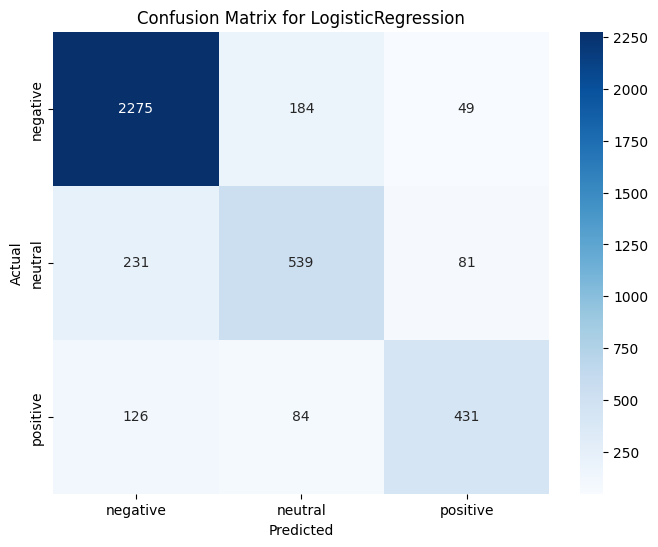

In [ ]:
# Display the confusion matrix for the best model
conf_matrix_best = confusion_matrix(test_data['airline_sentiment'].apply(lambda x: label_encoder.transform([x])[0]), y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_best, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

In [ ]:
best_accuracy = accuracies[best_model_name]
best_model_name, best_accuracy


('LogisticRegression', 0.81125)

In [30]:
import joblib

# Save the models to disk
joblib.dump(best_model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']